<a href="https://colab.research.google.com/github/hardik-vala/Tensor-Puzzles-2/blob/main/Tensor_Puzzles_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Puzzles 2

By: [hardik](hardikvala.com) ([@TheHardikVala](https://x.com/TheHardikVala))

I'm a huge fan of [Sasha Rush](http://rush-nlp.com/)'s [Tensor Puzzles](https://github.com/srush/Tensor-Puzzles/tree/main) for training your tensor programming muscle. LLM's are pretty good at writing pytorch or numpy code, but you still need a solid grasp of tensor operations to verify the code, and the code they write isn't expert quality (yet).

This notebook is a sequel to Tensor Puzzles, for those looking for additional practice, with a whole different collection of problems.

### diagrams

All diagrams were generated with the help of [tensordiagram](https://github.com/hardik-vala/tensordiagram)—a special-purpose python library for visualizing tensors—and [chalk](https://chalk-diagrams.github.io/)—a general-purpose python graphics library.

## instructions

Each puzzle is meant to be solved with some combination of tensor functions (e.g. `sum`, `mean`, `transpose`), @, arithmetic, comparison, shape, and indexing. Some puzzles ask you to reimplement one function from the `torch` library, and so they are *not* meant to be solved by calling that function.

If you're running this in Colab, I recommend you disable AI completions: Tools > Settings > AI Assistance > uncheck 'Show AI-powered inline completions'.

## setup

In [1]:
!pip install -qqq hypothesis jaxtyping tensordiagram
!wget -q https://github.com/hardik-vala/Tensor-Puzzles-2/raw/main/lib.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.6/535.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.0 MB/s eta 0:00:00


In [2]:
import math

from jaxtyping import Float, Integer as Int
import torch
from torch import Tensor as T

from lib import check, show

RANDOM_SEED = 37
_ = torch.manual_seed(RANDOM_SEED)

## 0 - add



### problem

Difficulty: **easy**

Add two tensors together, element-wise. Each element in the output tensor is the sum of the elements the input tensors, at that position.

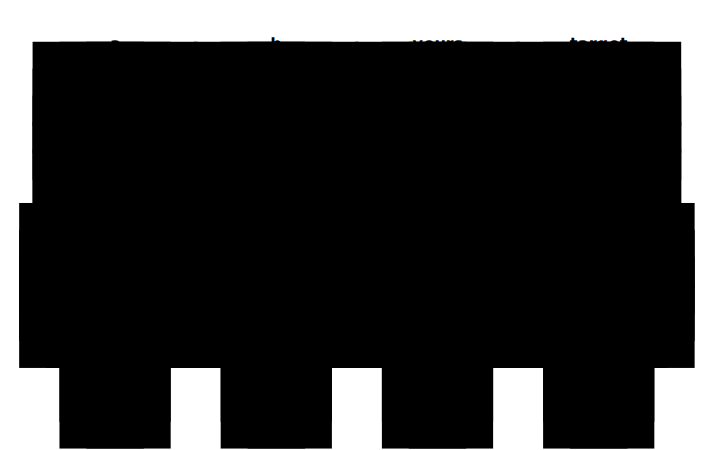

In [3]:
def add_spec(a, b):
  a_flat = a.flatten()
  b_flat = b.flatten()
  out_flat = torch.zeros_like(a_flat)

  for i in range(len(a_flat)):
    out_flat[i] = a_flat[i] + b_flat[i]

  return out_flat.reshape(a.shape)

def add(a: Int[T, "*shape"], b: Int[T, "*shape"]) -> Int[T, "*shape"]:
  return torch.zeros_like(a, dtype=torch.int32)

show(add, add_spec, max_dim=2, seed=RANDOM_SEED)

In [ ]:
check(add, add_spec, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def add(a: Int[T, "*shape"], b: Int[T, "*shape"]) -> Int[T, "*shape"]:
  return a + b

## 1 - fill tensor

Difficulty: **easy**

Fill each position of an input tensor with a specific value using broadcasting and basic arithmetic operations.



### problem

Difficulty: **easy**

Fill each position of an input tensor with a specific value using broadcasting and basic arithmetic operations.

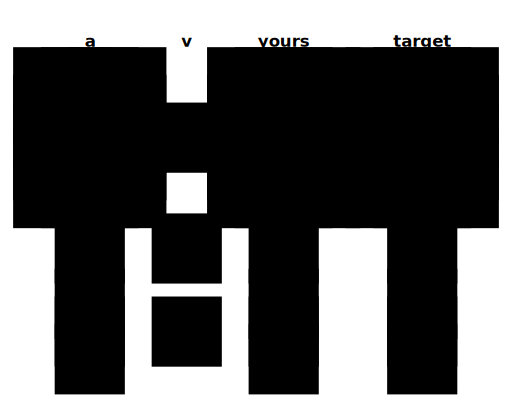

In [ ]:
def fill_tensor_spec(a, v):
  a_flat = a.flatten()
  out_flat = torch.zeros_like(a_flat)

  for i in range(len(a_flat)):
    out_flat[i] = v

  return out_flat.reshape(a.shape)

def fill_tensor(a: Int[T, "*shape"], v: Int[T, ""]) -> Int[T, "*shape"]:
  return torch.zeros_like(a, dtype=torch.int32)

show(fill_tensor, fill_tensor_spec, max_dim=2, seed=RANDOM_SEED)

In [ ]:
check(fill_tensor, fill_tensor_spec, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def fill_tensor(a: Int[T, "*shape"], v: Int[T, ""]) -> Int[T, "*shape"]:
  return a - a + v

## 2 - drop zero column

### problem

Difficulty: **easy**

Given a 2d tensor, remove the column with the most 0 elements. You can assume the input tensor contains at least one 0 element.

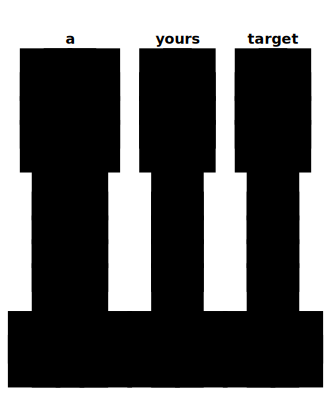

In [ ]:
def drop_zero_column_spec(a):
  m, n = a.shape

  zero_counts = []
  for col in range(n):
    count = 0
    for row in range(m):
      if a[row, col] == 0:
        count += 1
    zero_counts.append(count)

  max_zeros = -1
  max_col = -1
  for col in range(n):
    if zero_counts[col] > max_zeros:
      max_zeros = zero_counts[col]
      max_col = col

  out = torch.zeros((m, n - 1), dtype=a.dtype)
  out_col = 0
  for col in range(n):
    if col != max_col:
      for row in range(m):
        out[row, out_col] = a[row, col]
      out_col += 1

  return out

def drop_zero_column(a: Int[T, "m n"]) -> Int[T, "m k"]:
  return torch.zeros((a.shape[0], a.shape[1] -1), dtype=torch.int32)

def drop_zero_column_constraint(a: Int[T, "m n"]):
  if not (a == 0).any():
    a[0, 0] = 0
  return a

show(drop_zero_column, drop_zero_column_spec, max_dim=2, min_dim=2, min_side=2, constraint=drop_zero_column_constraint, seed=27)

In [ ]:
check(drop_zero_column, drop_zero_column_spec, max_dim=2, min_dim=2, min_side=2, constraint=drop_zero_column_constraint, seed=27)

### solution

In [ ]:
# @title
def drop_zero_column(a: Int[T, "m n"]) -> Int[T, "m k"]:
  i = (a == 0).sum(dim=0).argmax()
  mask = torch.arange(a.shape[1]) != i
  return a[:, mask]

## 3 - take

### problem

Difficulty: **easy**

Given an input tensor `a` and an index tensor `idx`, return a new tensor that has the same shape as `idx`, where its elements should be taken from `a` *as if `a` were a 1D (flattened) tensor*.

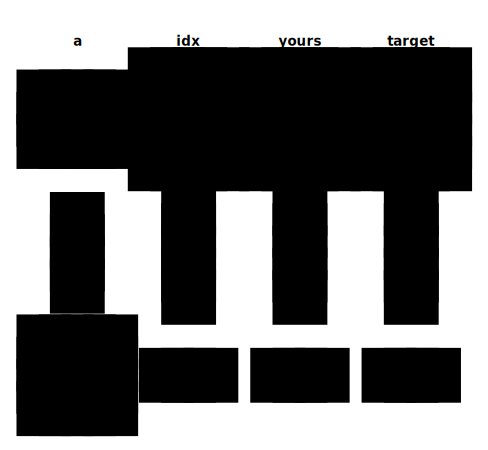

In [104]:
def take_spec(a, idx):
  a_flat = a.flatten()
  idx_flat = idx.flatten()
  out_flat = []

  for index in idx_flat.tolist():
    out_flat.append(a_flat[index])

  return torch.tensor(out_flat, dtype=a.dtype).reshape(idx.shape)

def take(a: Int[T, "m1 n1"], idx: Int[T, "m2 n2"]) -> Int[T, "m2 n2"]:
  return torch.zeros_like(idx, dtype=a.dtype)

def take_constraint(a, idx):
  num_elements = a.numel()
  # force indices to be valid
  idx = idx % num_elements
  return a, idx

show(take, take_spec, constraint=take_constraint, seed=RANDOM_SEED)

In [ ]:
check(take, take_spec, constraint=take_constraint, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def take(a: Int[T, "*shape1"], idx: Int[T, "*shape2"]) -> Int[T, "*shape2"]:
  return a.flatten()[idx]

## 4 - reshape and transpose

### problem

Difficulty: **easy**

Reshape a 1d tensor into a 2d tensor with 2 rows, and then, transpose the 2d tensor so the rows become columns and vice versa.

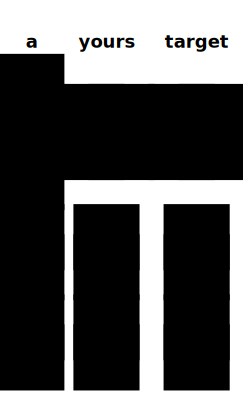

In [ ]:
def reshape_and_transpose_spec(a):
  out_rows = [[], []]

  m = a.shape[0]

  for i in range(m):
    # i % 2 determines the row: 0 or 1
    out_rows[i % 2].append(a[i].item())

  return torch.tensor(out_rows, dtype=a.dtype)

def reshape_and_transpose(a: Int[T, "m"]) -> Int[T, "2 m/2"]:
  return torch.zeros((2, (a.shape[0] + 1) // 2), dtype=torch.int32)

def reshape_and_transpose_constraint(a: Int[T, "m"]):
  if a.shape[0] % 2 != 0:
    return a[:-1]
  return a

show(reshape_and_transpose, reshape_and_transpose_spec, max_dim=1, min_dim=1, min_side=2, constraint=reshape_and_transpose_constraint, seed=RANDOM_SEED)

In [ ]:
check(reshape_and_transpose, reshape_and_transpose_spec, max_dim=1, min_dim=1, min_side=2, constraint=reshape_and_transpose_constraint, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def reshape_and_transpose(a: Int[T, "m"]) -> Int[T, "2 m//2"]:
  return a.view(2, -1).transpose(0, 1)

## 5 - sum of every second row

### problem

Difficulty: **easy**

Given a 2d tensor, return a tensor that has sum of all elements in even rows.

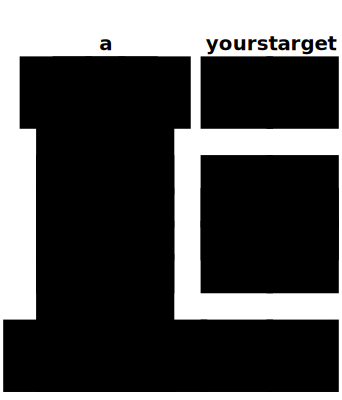

In [ ]:
def sum_every_second_spec(a):
  out = []

  for i in range(a.shape[0]):
    if i % 2 == 0:
      s = 0
      for j in range(a.shape[1]):
        s += a[i, j]
      out.append(s)

  return torch.tensor(out, dtype=a.dtype)

def sum_every_second(a: Int[T, "m n"]) -> Int[T, "m//2"]:
  return torch.zeros(a.shape[0] // 2, dtype=torch.int32)

show(sum_every_second, sum_every_second_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

In [ ]:
check(sum_every_second, sum_every_second_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def sum_every_second(a: Int[T, "m n"]) -> Int[T, "m//2"]:
  return a[::2].sum(dim=1)

## 6 - hstack (2d)

### problem

Difficulty: **medium**

Given two 2d tensors, `a` and `b`, which have the same number of rows, stack them horizontally. The resulting tensor should have the same number of rows as the inputs, and its columns should be the columns of `a` followed by the columns of `b`.

Don't use `torch.cat` or `torch.hstack` in your solution.

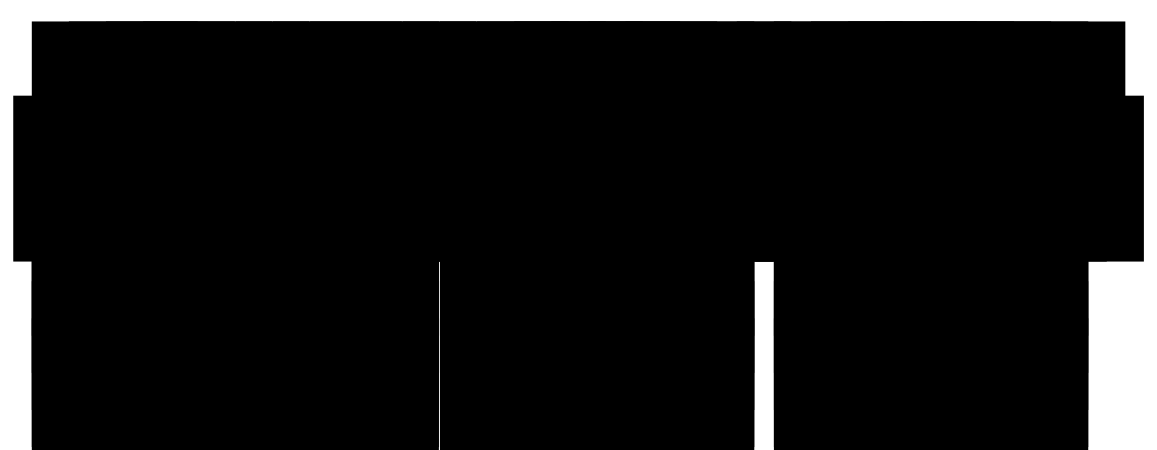

In [9]:
def hstack_spec(a, b):
  m, n1 = a.shape
  _m, n2 = b.shape

  out = torch.zeros((m, n1 + n2), dtype=a.dtype)
  for r in range(m):
    for c1 in range(n1):
      out[r, c1] = a[r, c1]
    for c2 in range(n2):
      out[r, n1 + c2] = b[r, c2]
  return out

def hstack(a: Int[T, "m n1"], b: Int[T, "m n2"]) -> Int[T, "m n1+n2"]:
  m, n1 = a.shape
  _m, n2 = b.shape
  return torch.zeros((m, n1 + n2), dtype=torch.int32)

show(hstack, hstack_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

In [ ]:
check(hstack, hstack_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

### solution

In [10]:
# @title
def hstack(a: Int[T, "m n1"], b: Int[T, "m n2"]) -> Int[T, "m k"]:
  m, n1 = a.shape
  _m, n2 = b.shape

  out = torch.zeros((m, n1 + n2), dtype=a.dtype)

  out[:, :n1] = a
  out[:, n1:] = b

  return out

## 7 - highest mean row

### problem

Difficulty: **easy**

Given a 2d tensor, return the index of the row with the highest mean value.

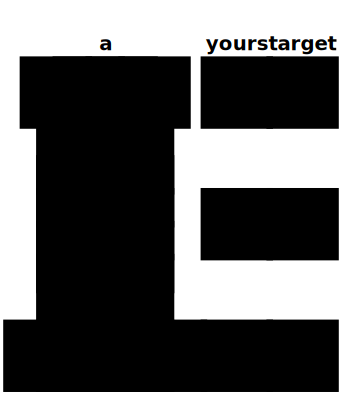

In [ ]:
def highest_row_mean_spec(a):
  means = []

  for i in range(a.shape[0]):
    s = 0
    for j in range(a.shape[1]):
      s += a[i, j]
    means.append(s / a.shape[1])

  max_mean = -math.inf
  max_i = None
  for i, m in enumerate(means):
    if m > max_mean:
      max_mean = m
      max_i = i

  return torch.tensor(max_i)

def highest_row_mean(a: Int[T, "m n"]) -> Int[T, ""]:
  return torch.tensor(0)

show(highest_row_mean, highest_row_mean_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

In [ ]:
check(highest_row_mean, highest_row_mean_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def highest_row_mean(a: Int[T, "m n"]) -> Int[T, ""]:
  return a.mean(dim=1, dtype=torch.float32).argmax()

## 8 - mean squared error

### problem

Difficulty: **easy**

Compute [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) loss between two tensors. The MSE is calculated as the average of the squared differences between corresponding elements in the two tensors. The solution should support tensors of any dimensionality, and you can assum the two tensors will have the same shape.

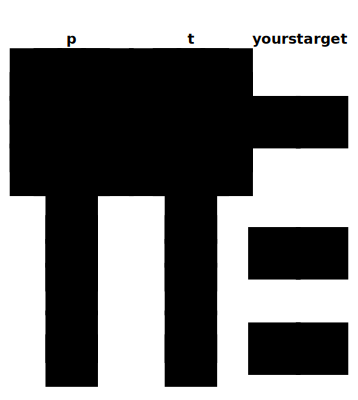

In [ ]:
def mse_spec(p, t):
  p_flat = p.flatten()
  t_flat = t.flatten()
  se = 0.

  for i in range(len(p_flat)):
    se += (p_flat[i] - t_flat[i])**2

  return se / len(p_flat)

def mse(p: Int[T, "*shape"], t: Int[T, "*shape"]) -> Float[T, ""]:
  return torch.tensor(0.)

show(mse, mse_spec, max_dim=2, seed=RANDOM_SEED, max_value=2, min_value=-2)

In [ ]:
check(mse, mse_spec, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def mse(p: Int[T, "*shape"], t: Int[T, "*shape"]) -> Float[T, ""]:
  return ((p - t) ** 2).mean(dtype=torch.float32)

## 9 - top score

### problem

Difficulty: **easy**

You're given a 2d tensor with binary values (0 or 1), where each row corresponds to a student, and each cell represents whether they got a question right or wrong on a test. You're also given a 1d tensor indicating the points to award for each question. Return the index of the row with the highest score.

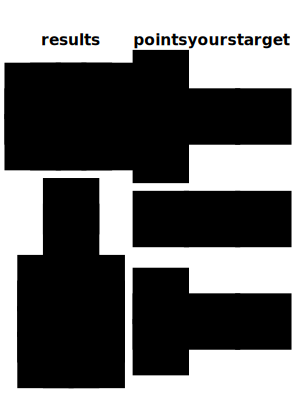

In [7]:
def top_score_spec(results, points):
  m, n = results.shape
  scores = []

  for i in range(m):
    s = 0
    for j in range(n):
      s += results[i, j].item() * points[j].item()
    scores.append(s)

  if not scores:
    return torch.tensor(0)

  max_score = -math.inf
  max_i = None

  for i, s in enumerate(scores):
    if s > max_score:
      max_score = s
      max_i = i

  return torch.tensor(max_i)

def top_score(results: Int[T, "m n"], points: Int[T, "n"]) -> Int[T, ""]:
  return torch.tensor(0)

show(top_score, top_score_spec, max_value=1, min_value=0, seed=RANDOM_SEED)

In [ ]:
check(top_score, top_score_spec, max_value=1, min_value=0, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def top_score(results: Int[T, "m n"], points: Int[T, "n"]) -> Int[T, ""]:
  return (results @ points).argmax()

## 10 - softmax

### problem

Difficulty: **easy**

Given a 2d tensor, apply the [softmax](https://en.wikipedia.org/wiki/Softmax_function) function over each row.

In ML, you often have a matrix (2d tensor) where each row represents a distinct data point, each column represents a class, and each element represents some score. The softmax function is applied row-wise to transform the raw scores into probabilities that a data point corresponds to a class. The softmax function is often used in the output layer of a neural network to compute the probability distribution of the possible classes.

In [ ]:
def softmax_spec(logits):
  return torch.softmax(logits, dim=-1)

def softmax(logits: Float[T, "m n"]) -> Float[T, "m n"]:
  return torch.zeros_like(logits)

In [ ]:
check(softmax, softmax_spec, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def softmax(logits: Float[T, "m n"]) -> Float[T, "m n"]:
  exps = torch.exp(logits)
  return exps / exps.sum(dim=-1, keepdim=True)

## 11 - normalize and count

### problem

Difficulty: **easy**

Given a 2d tensor of scores, normalize the scores for each column using the softmax function, and return a 1d tensor representing how many rows have a normalized score greater than some input threshold for each column.


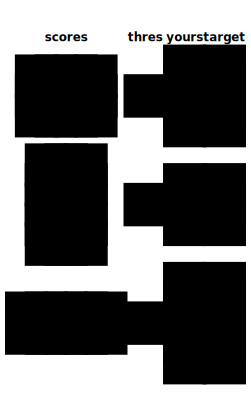

In [36]:
def normalize_and_count_spec(scores, thres):
  normalized_scores = torch.softmax(scores, dim=0)

  m, n = normalized_scores.shape
  greater_than_thres = []

  for i in range(n):
    count = 0
    for j in range(m):
      if normalized_scores[j, i] > thres:
        count += 1
    greater_than_thres.append(count)

  return torch.tensor(greater_than_thres, dtype=torch.int32)

def normalize_and_count(scores: Float[T, "m n"], thres: Float[T, ""]) -> Float[T, "m"]:
  return torch.zeros(scores.shape[1], dtype=torch.int32)

def normalize_and_count_constraint(scores: Float[T, "m n"], thres: Float[T, ""]):
  if abs(thres.item()) > 1:
    return scores, torch.randn_like(thres).abs()
  return scores, thres

show(normalize_and_count, normalize_and_count_spec, constraint=normalize_and_count_constraint, seed=RANDOM_SEED)

In [ ]:
check(normalize_and_count, normalize_and_count_spec, constraint=normalize_and_count_constraint, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def normalize_and_count(scores: Float[T, "m n"], thres: Float[T, ""]) -> Float[T, "m"]:
  normalized_scores = torch.softmax(scores, dim=0)
  greater_than_thres = normalized_scores > thres
  return greater_than_thres.sum(dim=0).to(torch.int32)

## 12 - diagonal sum difference

### problem

Difficulty: **medium**

Given a square 2d tensor, compute the absolute difference between the sum of the main diagonal (top-left to bottom-right) and the sum of the anti-diagonal (top-right to bottom-left).

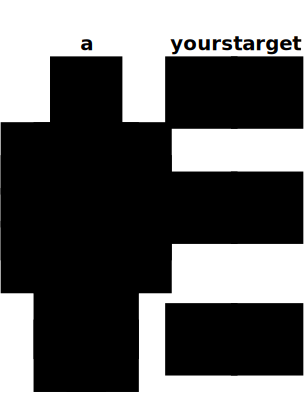

In [43]:
def diagonal_sum_difference_spec(a):
  n = a.shape[0]

  main_diag_sum = 0
  for i in range(n):
    main_diag_sum += a[i, i]

  anti_diag_sum = 0
  for i in range(n):
    anti_diag_sum += a[i, n - 1 - i]

  return (main_diag_sum - anti_diag_sum).abs()

def diagonal_sum_difference(a: Int[T, "n n"]) -> Int[T, ""]:
  return torch.tensor(0)

show(diagonal_sum_difference, diagonal_sum_difference_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

In [ ]:
check(diagonal_sum_difference, diagonal_sum_difference_spec, max_dim=2, min_dim=2, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def diagonal_sum_difference(a: Int[T, "n n"]) -> Int[T, ""]:
  main_diag = a.diag().sum()
  anti_diag = a.flip(1).diag().sum()
  return (main_diag - anti_diag).abs()

## 13 - batch norm

### problem

Difficulty: **medium**

Given a 2d tensor, implement [batch normalization](https://en.wikipedia.org/wiki/Batch_normalization) without using built-in functions. Each row of the input tensor represents a data point and each column represents a feature. Normalize each feature (column) to have mean 0 and variance 1 across the "batch".

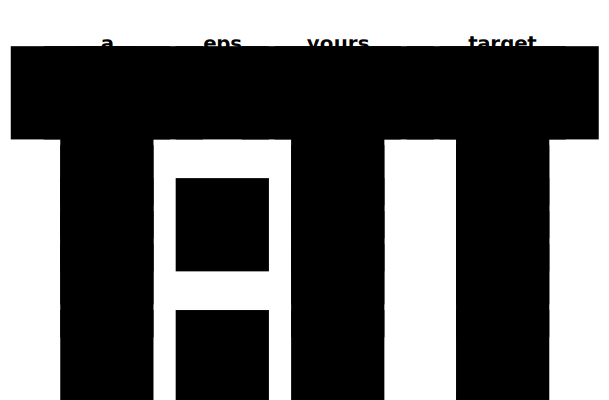

In [48]:
def batch_norm_spec(a, eps):
  m, n = a.shape
  out = torch.zeros_like(a, dtype=torch.float32)

  for j in range(n):
    # mean for each feature
    mean = 0.
    for i in range(m):
      mean += a[i, j]
    mean = mean / m

    # variance for each feature
    var = 0.
    for i in range(m):
      var += (a[i, j] - mean) ** 2
    var = var / m

    # normalize
    for i in range(m):
      out[i, j] = (a[i, j] - mean) / torch.sqrt(var + eps)

  return out

def batch_norm(a: Float[T, "m n"], eps: Float[T, ""]) -> Float[T, "m n"]:
  # eps is a small constant to prevent division by zero
  return torch.zeros_like(a, dtype=torch.float32)

def batch_norm_constraint(a, eps):
  return a, torch.tensor(1e-5)

show(batch_norm, batch_norm_spec, max_dim=2, min_dim=2, constraint=batch_norm_constraint, seed=RANDOM_SEED)

In [ ]:
check(batch_norm, batch_norm_spec, max_dim=2, min_dim=2, constraint=batch_norm_constraint, seed=RANDOM_SEED)

### solution

In [ ]:
# @title
def batch_norm(a: Float[T, "m n"], eps: Float[T, ""]) -> Float[T, "m n"]:
  mean = a.mean(dim=0, keepdim=True)
  var = a.var(dim=0, keepdim=True, unbiased=False)
  return (a - mean) / torch.sqrt(var + eps)

## 14 - cumprod

### problem

Difficulty: **medium**

Given a 1d tensor, return a new tensor where each element is the product of all elements up to and including that position. This is similar to a cumulative sum, but with multiplication instead.

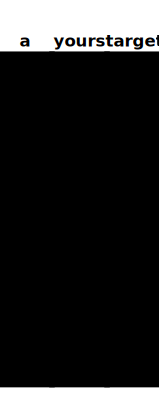

In [72]:
def cumprod_spec(a):
  out = []
  product = 1

  for i in range(a.shape[0]):
    product *= a[i].item()
    out.append(product)

  return torch.tensor(out, dtype=a.dtype)

def cumprod(a: Int[T, "m"]) -> Int[T, "m"]:
  return torch.zeros_like(a, dtype=a.dtype)

show(cumprod, cumprod_spec, max_dim=1, min_dim=1, max_value=3, min_value=1, seed=RANDOM_SEED)

In [ ]:
check(cumprod, cumprod_spec, max_dim=1, min_dim=1, max_value=3, min_value=1, seed=RANDOM_SEED)

### solution

In [69]:
# @title
def cumprod(a: Int[T, "m"]) -> Int[T, "m"]:
  m = a.shape[0]
  expanded = torch.tril(torch.zeros(m, m, dtype=a.dtype) + a)
  upper_ones = torch.where(torch.arange(m)[:, None] < torch.arange(m)[None, :], 1, 0)
  return (expanded + upper_ones).prod(dim=1)

## 15 - gather

### problem

Difficulty: **medium**

Given a 2d tensor `a`, a scalar dimension `dim` (0 or 1), and a 2d index tensor `idx`, create a tensor `out` that has the same shape as `idx`.

If `dim=0`, the output `out[i, j]` should be the value `a[idx[i, j], j]`.

If `dim=1`, the output `out[i, j]` should be the value `a[i, idx[i, j]]`.

You can assume `a` and `idx` are 2d and their shapes are compatible (i.e., they match on the non-gathering dimension).

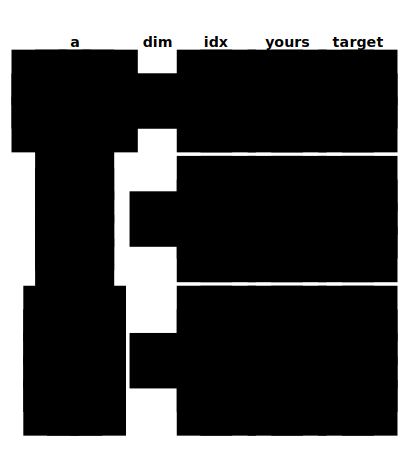

In [27]:
def gather_spec(a, dim, idx):
  dim_val = dim.item()
  out = torch.zeros_like(idx, dtype=a.dtype)
  k, l = idx.shape

  if dim_val == 0:
    for i in range(k):
      for j in range(l):
        out[i, j] = a[idx[i, j], j]
  else:
    for i in range(k):
      for j in range(l):
        out[i, j] = a[i, idx[i, j]]

  return out

def gather(a: Int[T, "m n"], dim: Int[T, ""], idx: Int[T, "k l"]) -> Float[T, "k l"]:
  return torch.zeros_like(idx, dtype=a.dtype)

def gather_constraint(a, dim, idx):
  # force dim to be 0 or 1
  dim_val = dim.item() % 2
  dim = torch.tensor(dim_val)

  m, n = a.shape
  k, l = idx.shape

  if dim_val == 0:
    if n != l:
      new_l = min(n, l)
      a = a[:, :new_l]
      idx = idx[:, :new_l]
    if m < k:
      idx = idx[:m, :]
    idx = idx % m
  else:
    if m != k:
      new_k = min(m, k)
      a = a[:new_k, :]
      idx = idx[:new_k, :]
    if n < l:
      idx = idx[:, :n]
    idx = idx % n

  return a, dim, idx

show(gather, gather_spec, max_dim=2, min_dim=2, min_side=2, constraint=gather_constraint, seed=82)

In [ ]:
check(gather, gather_spec, max_dim=2, min_dim=2, constraint=gather_constraint, seed=82)

### solution

In [ ]:
def gather(a: Int[T, "m n"], dim: Int[T, ""], idx: Int[T, "k l"]) -> Float[T, "k l"]:
  dim_val = dim.item()

  if dim_val == 0:
    cols = torch.arange(a.shape[1]).view(1, -1)
    return a[idx, cols]
  else:
    rows = torch.arange(a.shape[0]).view(-1, 1)
    return a[rows, idx]

## credits

 - [Sasha Rush](http://rush-nlp.com/), for [Tensor Puzzles](https://github.com/srush/Tensor-Puzzles/tree/main) and inspiration
 - [TensorGym](https://tensorgym.com/), for puzzles
 - [whytorch.org](https://whytorch.org/), for being a reference for torch ops
 - [tensordiagram](https://github.com/hardik-vala/tensordiagram) and [chalk](https://chalk-diagrams.github.io/), for the diagrams
